# 犬と猫の分類問題

サンプル数
・dog:250枚
・cat:250枚

seed = 0

課題：AccuracyがValidationのデータに対して70%得られていること

# 教師データ作成

In [1]:
# 警告表示の無視
import warnings
warnings.filterwarnings('ignore')

In [2]:
from glob import glob
path_dog = glob('data/dog/*.jpg')
path_cat = glob('data/cat/*.jpg')
len_data = len(path_dog)

In [3]:
import numpy as np
from PIL import Image

data_x, data_y = [], []
for i in range(len_data):
    _img = Image.open(path_dog[i])
    img = np.array(_img)
    data_x.append(img)
    data_y.append(0)

    _img = Image.open(path_cat[i])
    img = np.array(_img)
    data_x.append(img)
    data_y.append(1)
    
data_x = np.array(data_x)/255
data_y = np.array(data_y)

In [4]:
import tensorflow as tf
import os
import random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

reset_seed(0)

from sklearn.model_selection import train_test_split
    
x_train, x_val, y_train, y_val = train_test_split(
    data_x, data_y, test_size=0.3, random_state=0
)

len(x_train), len(y_train), len(x_val), len(y_val)

(350, 350, 150, 150)

In [5]:
# 必要なモジュールのインポート
from tensorflow import keras
from tensorflow.keras import models,layers

model = models.Sequential()

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(
    128, (3, 3),
    activation='relu',
    padding='same',
    input_shape=(224, 224, 3)))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D(
    (2, 2), strides=(2, 2)))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(
    64, (3, 3),
    activation='relu',
    padding='same'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D(
    (2, 2), strides=(2, 2)))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(
    32, (3, 3),
    activation='relu',
    padding='same'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D(
    (2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

epoch = 3
batchsize = 100

# 学習
model.fit(x_train, y_train,
          batch_size=batchsize,
          epochs=epoch,
          verbose=1,
          validation_data=(x_val, y_val))

Train on 350 samples, validate on 150 samples
Epoch 1/3
350/350 [==============================] - 53s 151ms/sample - loss: 0.7385 - accuracy: 0.5343 - val_loss: 0.6934 - val_accuracy: 0.5067
Epoch 2/3
350/350 [==============================] - 49s 141ms/sample - loss: 0.7686 - accuracy: 0.5143 - val_loss: 0.6930 - val_accuracy: 0.5067
Epoch 3/3
350/350 [==============================] - 49s 141ms/sample - loss: 0.7540 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5067


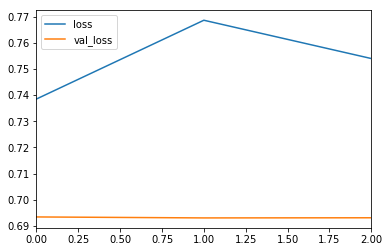

In [6]:
%matplotlib inline
import pandas as pd
# 学習結果をPandasのDataFrame型で読み込みます。
results = pd.DataFrame(model.history.history)

# loss（損失関数）を表示
results[['loss', 'val_loss']].plot()

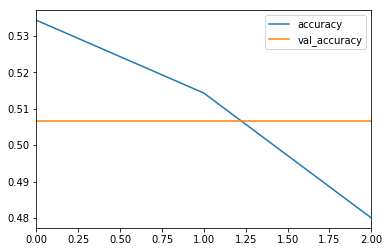

In [7]:
# accuracy（精度）を表示
results[['accuracy', 'val_accuracy']].plot()

In [10]:
results[['accuracy', 'val_accuracy']]

,accuracy,val_accuracy
0,0.534286,0.506667
1,0.514286,0.506667
2,0.480000,0.506667
